In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pickle
from glob import glob

import numpy as np
import pandas as pd

import settings as conf
import metadata

# Figures path

In [3]:
figures_path = os.path.join(conf.DELIVERABLES_DIR, 'figures')
os.makedirs(figures_path, exist_ok=True)

# Load gene mappings

In [4]:
with open(os.path.join(conf.GENES_METADATA_DIR, 'genes_mapping_simplified-0.pkl'), 'rb') as f:
    genes_mapping_0 = pickle.load(f)

with open(os.path.join(conf.GENES_METADATA_DIR, 'genes_mapping_simplified-1.pkl'), 'rb') as f:
    genes_mapping_1 = pickle.load(f)

# Load S-MultiXcan results

In [5]:
spredixcan_genes_associations_filename = os.path.join(conf.GENE_ASSOC_DIR, 'smultixcan-mashr-pvalues.pkl.xz')
display(spredixcan_genes_associations_filename)

spredixcan_genes_associations = pd.read_pickle(spredixcan_genes_associations_filename)

'/mnt/phenomexcan_base/gene_assoc/smultixcan-mashr-pvalues.pkl.xz'

In [6]:
spredixcan_genes_associations.shape

(22515, 4091)

In [7]:
spredixcan_genes_associations.head(5)

,20096_1-Size_of_red_wine_glass_drunk_small_125ml,2345-Ever_had_bowel_cancer_screening,N49-Diagnoses_main_ICD10_N49_Inflammatory_disorders_of_male_genital_organs_not_elsewhere_classified,100011_raw-Iron,5221-Index_of_best_refractometry_result_right,20003_1141150624-Treatmentmedication_code_zomig_25mg_tablet,S69-Diagnoses_main_ICD10_S69_Other_and_unspecified_injuries_of_wrist_and_hand,20024_1136-Job_code_deduced_Information_and_communication_technology_managers,20002_1385-Noncancer_illness_code_selfreported_allergy_or_anaphylactic_reaction_to_food,G6_SLEEPAPNO-Sleep_apnoea,...,Astle_et_al_2016_Sum_basophil_neutrophil_counts,RA_OKADA_TRANS_ETHNIC,pgc.scz2,PGC_ADHD_EUR_2017,MAGIC_FastingGlucose,Astle_et_al_2016_Red_blood_cell_count,SSGAC_Depressive_Symptoms,BCAC_ER_positive_BreastCancer_EUR,IBD.EUR.Inflammatory_Bowel_Disease,Astle_et_al_2016_High_light_scatter_reticulocyte_count
gene_name,,,,,,,,,,,,,,,,,,,,,
ENSG00000000419,0.865429,0.918314,0.810683,0.374671,0.189032,0.140981,0.467741,0.129427,0.193680,0.285479,...,0.416210,0.782554,0.609467,0.980281,0.666504,0.409761,0.713310,0.168319,0.460244,0.765506
ENSG00000000457,0.174192,0.064765,0.889194,0.896938,0.448596,0.269602,0.540261,0.068405,0.041813,0.313427,...,0.149360,0.512603,0.010907,0.228982,0.607081,0.812484,0.678749,0.918971,0.311187,0.344574
ENSG00000000460,0.879969,0.240715,0.238228,0.567555,0.921320,0.825036,0.782230,0.644525,0.392273,0.840014,...,0.503520,0.764147,0.587969,0.301460,0.629621,0.486664,0.736509,0.933600,0.000477,0.321223
ENSG00000000938,0.192670,0.400054,0.114353,0.470700,0.889202,0.000011,0.899764,0.212352,0.829671,0.372348,...,0.899212,0.961678,0.059247,0.588855,0.898525,0.135045,0.954998,0.088220,0.176497,0.304281
ENSG00000000971,0.180632,0.793060,0.490585,0.088752,0.744531,0.949639,0.253817,0.377408,0.971655,0.070266,...,0.390618,0.093824,0.020391,0.109883,0.870551,0.995450,0.002660,0.421588,0.656851,0.868416


# Tissues

In [8]:
with open(conf.FASTENLOC_GTEX_TISSUES_FILE, 'r') as f:
    FASTENLOC_TISSUES_NAMES = set([x.strip() for x in f.readlines()])

In [9]:
assert len(FASTENLOC_TISSUES_NAMES) == 49

In [10]:
FASTENLOC_TISSUES_NAMES

{'Adipose_Subcutaneous',
 'Adipose_Visceral_Omentum',
 'Adrenal_Gland',
 'Artery_Aorta',
 'Artery_Coronary',
 'Artery_Tibial',
 'Brain_Amygdala',
 'Brain_Anterior_cingulate_cortex_BA24',
 'Brain_Caudate_basal_ganglia',
 'Brain_Cerebellar_Hemisphere',
 'Brain_Cerebellum',
 'Brain_Cortex',
 'Brain_Frontal_Cortex_BA9',
 'Brain_Hippocampus',
 'Brain_Hypothalamus',
 'Brain_Nucleus_accumbens_basal_ganglia',
 'Brain_Putamen_basal_ganglia',
 'Brain_Spinal_cord_cervical_c-1',
 'Brain_Substantia_nigra',
 'Breast_Mammary_Tissue',
 'Cells_Cultured_fibroblasts',
 'Cells_EBV-transformed_lymphocytes',
 'Colon_Sigmoid',
 'Colon_Transverse',
 'Esophagus_Gastroesophageal_Junction',
 'Esophagus_Mucosa',
 'Esophagus_Muscularis',
 'Heart_Atrial_Appendage',
 'Heart_Left_Ventricle',
 'Kidney_Cortex',
 'Liver',
 'Lung',
 'Minor_Salivary_Gland',
 'Muscle_Skeletal',
 'Nerve_Tibial',
 'Ovary',
 'Pancreas',
 'Pituitary',
 'Prostate',
 'Skin_Not_Sun_Exposed',
 'Skin_Sun_Exposed',
 'Small_Intestine_Terminal_Ileum',

# Functions

In [11]:
from glob import glob

In [12]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import plots

In [13]:
def create_df_plot(fastenloc_results, enloc_results):
    fastenloc_results = fastenloc_results.unstack()
    enloc_results = enloc_results.unstack()
    
    common_index = fastenloc_results.index.intersection(enloc_results.index)
    
    df = pd.DataFrame(data={'ENLOC': enloc_results, 'fastENLOC': fastenloc_results}, index=common_index)
    
    return df.dropna()

## Read ENLOC data

In [14]:
ENLOC_RUNS_DIR = os.path.join(conf.MISC_RESULTS_BASE_DIR, 'enloc-selected_traits')

In [15]:
def read_enloc(phenotype, tissue):
    enloc_filename = f'{phenotype}__PM__{tissue}.enloc.rst.gz'
    enloc_result_path = os.path.join(ENLOC_RUNS_DIR, phenotype, enloc_filename)
    
    enloc_result = pd.read_csv(enloc_result_path, sep='\s+')
    enloc_result = enloc_result.assign(gene_id=enloc_result['molecular_qtl_trait'].apply(lambda x: x.split('.')[0]))
    
    return enloc_result.groupby('gene_id')['locus_rcp'].max().rename(tissue)

def read_enloc_all_tissues(phenotype_code):
    all_tissues_data = {}
    for tissue in FASTENLOC_TISSUES_NAMES:
        if tissue.startswith('Skin_'):
            continue
        all_tissues_data[tissue] = read_enloc(phenotype_code, tissue)
    
    return pd.DataFrame(all_tissues_data)

## Read fastENLOC data

In [16]:
FASTENLOC_DIR = conf.FASTENLOC_RESULTS_DIR['RapidGWASProject']

In [17]:
def read_fe(phenotype_code, tissue, rename_genes=False):
    filename = f'fastenloc-{phenotype_code}-{tissue}.enloc.sig.out'
    filepath = os.path.join(FASTENLOC_DIR, phenotype_code, filename)
    
    fe_data = pd.read_csv(filepath, sep='\s+', usecols=[0, 5], header=None).rename(columns={0: 'gene_cluster', 5: 'rcp'})
    fe_data = fe_data = fe_data.assign(gene=fe_data['gene_cluster'].apply(lambda x: x.split(':')[0])) 
    fe_data = fe_data.assign(gene_cluster=fe_data['gene_cluster'].apply(lambda x: x.split(':')[1]))
    
    # FIXME: is it correct to sum across clusters of a gene? or pick max? Haky thinks summing is fine.
    fe_max = fe_data.groupby('gene')['rcp'].sum()
    #fe_max = fe_max.loc[fe_max.index.intersection(all_gene_ids)]
    if rename_genes:
        fe_max = fe_max.rename(index=genes_mapping_0)
    
    return fe_max.rename(tissue)

def read_fe_all_tissues(phenotype_code, rename_genes=False):
    all_tissues_data = {}
    for tissue in FASTENLOC_TISSUES_NAMES:
        if tissue.startswith('Skin_'):
            continue
        all_tissues_data[tissue] = read_fe(phenotype_code, tissue, rename_genes)
    
    return pd.DataFrame(all_tissues_data)

def read_pheno(pheno, df): 
    _tmp = df[df['pheno'] == pheno] 
    if _tmp.shape[0] == 0: 
        return None 
     
    _res = {} 
    _all_genes = set() 
    for idx, _data in _tmp.iterrows(): 
        #print(_data.tissue) 
         
        tissue_data = read_fe(_data.file) 
        _res[_data.tissue] = tissue_data 
        _all_genes.update(tissue_data.index) 
    
    return pd.DataFrame(_res, index=_all_genes).fillna(-1).max(axis=1)

In [18]:
# create summary of files
_path = os.path.join(conf.FASTENLOC_RESULTS_DIR['RapidGWASProject'], '**/*.enloc.sig.out')
display(_path)
all_fastenloc_results_files = glob(_path)

'/mnt/phenomexcan_base/results/fastenloc/rapid_gwas_project/**/*.enloc.sig.out'

In [19]:
len(all_fastenloc_results_files)

198401

In [20]:
PHENO_CODES = set(metadata.RAPID_GWAS_PHENO_INFO.index)

In [21]:
len(PHENO_CODES)

4359

In [22]:
phenos = []
tissues = []

for f in all_fastenloc_results_files:
    f = os.path.basename(f)
    split = f.split('-')
    
    tiss = split[-1].split('.')[0]
    if tiss not in FASTENLOC_TISSUES_NAMES:
        tiss = '-'.join(split[-2:]).split('.')[0]
    
    phen = split[1]
    if phen not in PHENO_CODES:
        phen = '-'.join(split[1:3])
    
    phenos.append(phen)
    tissues.append(tiss)

results_summary = pd.DataFrame({'pheno': phenos, 'tissue': tissues, 'file': all_fastenloc_results_files})

In [23]:
results_summary.shape

(198401, 3)

In [24]:
results_summary.head()

,pheno,tissue,file
0,22617_9219,Brain_Spinal_cord_cervical_c-1,/mnt/phenomexcan_base/results/fastenloc/rapid_...
1,22617_9219,Artery_Coronary,/mnt/phenomexcan_base/results/fastenloc/rapid_...
2,22617_9219,Brain_Cortex,/mnt/phenomexcan_base/results/fastenloc/rapid_...
3,22617_9219,Brain_Substantia_nigra,/mnt/phenomexcan_base/results/fastenloc/rapid_...
4,22617_9219,Breast_Mammary_Tissue,/mnt/phenomexcan_base/results/fastenloc/rapid_...


In [25]:
results_summary['pheno'].unique().shape

(4049,)

In [26]:
np.all([t in PHENO_CODES for t in results_summary['pheno'].unique()])

True

In [27]:
results_summary['tissue'].unique().shape

(49,)

In [28]:
np.all([t in FASTENLOC_TISSUES_NAMES for t in results_summary['tissue'].unique()])

True

In [29]:
_all_tissues_in_results = results_summary['tissue'].unique()
np.all([t in _all_tissues_in_results for t in FASTENLOC_TISSUES_NAMES])

True

## All RCPs across all tissues for particular phenotypes

In [30]:
spredixcan_genes_associations.columns[spredixcan_genes_associations.columns.str.lower().str.contains('6152_9')]

Index(['6152_9-Blood_clot_DVT_bronchitis_emphysema_asthma_rhinitis_eczema_allergy_diagnosed_by_doctor_Hayfever_allergic_rhinitis_or_eczema'], dtype='object')

In [31]:
PHENO_MAPPINGS = {
    '50_raw': 'UKB_50_Standing_height',
    '1160': 'UKB_1160_Sleep_duration',
    '6152_9': 'UKB_6152_9_diagnosed_by_doctor_Hayfever_allergic_rhinitis_or_eczema',
    '20016_raw': 'UKB_20016_Fluid_intelligence_score',
}

## Height: 50_raw

In [32]:
PHENOTYPE_SELECTED = '50_raw'

In [33]:
fe_all = read_fe_all_tissues(PHENOTYPE_SELECTED)

In [34]:
fe_all.shape

(37360, 47)

In [35]:
fe_all.head()

,Artery_Aorta,Heart_Atrial_Appendage,Pituitary,Testis,Muscle_Skeletal,Uterus,Colon_Transverse,Stomach,Artery_Coronary,Whole_Blood,...,Adipose_Subcutaneous,Brain_Cerebellum,Vagina,Brain_Nucleus_accumbens_basal_ganglia,Brain_Cortex,Spleen,Cells_EBV-transformed_lymphocytes,Prostate,Nerve_Tibial,Thyroid
ENSG00000000419,1.080000e-06,1.100200e-06,1.994300e-05,0.000005,1.141000e-05,1.717692e-04,6.731000e-06,1.483500e-06,3.793000e-06,1.607000e-06,...,7.439000e-06,1.427759e-04,2.798700e-06,4.078400e-06,6.274000e-06,5.049000e-06,8.852000e-06,1.166800e-06,5.922080e-05,1.492200e-05
ENSG00000000457,6.854100e-04,3.274600e-04,1.335000e-03,0.002193,2.856830e-03,3.142100e-04,1.205660e-03,6.987980e-04,8.122100e-04,9.674980e-04,...,3.332710e-03,1.956220e-03,1.795500e-04,1.147520e-03,1.697814e-03,8.169751e-04,7.422700e-04,6.667430e-04,2.903590e-03,2.069750e-03
ENSG00000000460,3.247900e-03,8.961700e-04,1.747988e-03,0.002657,1.643046e-03,1.518300e-04,1.632016e-03,8.221000e-05,1.058500e-04,1.574440e-03,...,5.365300e-04,3.919400e-03,2.608300e-04,6.074000e-04,8.046100e-04,7.701000e-05,7.564000e-05,2.833594e-03,1.231018e-03,1.207865e-03
ENSG00000000938,3.087900e-07,2.042400e-08,2.360500e-08,0.000001,4.529410e-07,2.835000e-08,5.327000e-07,2.771910e-07,1.267500e-08,7.379000e-08,...,4.869300e-07,5.233000e-08,1.112700e-08,2.128400e-08,1.451700e-08,5.381800e-08,6.220000e-08,2.968000e-08,4.375000e-07,5.045300e-07
ENSG00000000971,2.032760e-03,2.207462e-03,8.172900e-04,0.001288,7.016100e-05,1.195000e-04,6.850000e-05,2.881800e-04,2.144150e-03,5.924000e-04,...,8.699000e-04,1.505000e-03,4.027000e-05,5.216000e-05,1.697669e-03,2.085200e-04,6.206000e-05,4.653000e-05,3.147968e-03,1.485237e-03


In [36]:
enloc_all = read_enloc_all_tissues(PHENO_MAPPINGS[PHENOTYPE_SELECTED])

In [37]:
enloc_all.shape

(22709, 47)

In [38]:
enloc_all.head()

,Artery_Aorta,Heart_Atrial_Appendage,Pituitary,Testis,Muscle_Skeletal,Uterus,Colon_Transverse,Stomach,Artery_Coronary,Whole_Blood,...,Adipose_Subcutaneous,Brain_Cerebellum,Vagina,Brain_Nucleus_accumbens_basal_ganglia,Brain_Cortex,Spleen,Cells_EBV-transformed_lymphocytes,Prostate,Nerve_Tibial,Thyroid
ENSG00000000419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000000457,0.0,0.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENSG00000000460,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN
ENSG00000000938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000000971,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [39]:
df = create_df_plot(fe_all, enloc_all)

In [40]:
df.shape

(775522, 2)

In [41]:
df.head()

,,ENLOC,fastENLOC
Cells_EBV-transformed_lymphocytes,ENSG00000147364,0.000,3.891000e-05
Brain_Substantia_nigra,ENSG00000183773,0.000,8.741000e-15
Cells_EBV-transformed_lymphocytes,ENSG00000105669,0.000,1.187100e-29
Uterus,ENSG00000088727,0.006,1.002420e-18
Brain_Spinal_cord_cervical_c-1,ENSG00000239642,0.000,3.921009e-53


In [42]:
df_plot = df[(df['ENLOC'] > 0.1) & (df['fastENLOC'] > 0.1)]

In [43]:
stats.pearsonr(df_plot['ENLOC'].values, df_plot['fastENLOC'].values)

(0.6893875605209894, 0.0)

In [44]:
stats.spearmanr(df_plot['ENLOC'].values, df_plot['fastENLOC'].values)

SpearmanrResult(correlation=0.6100732047254849, pvalue=0.0)

In [45]:
# final refining
df_plot = df_plot[df_plot['fastENLOC'] <= 1.05]

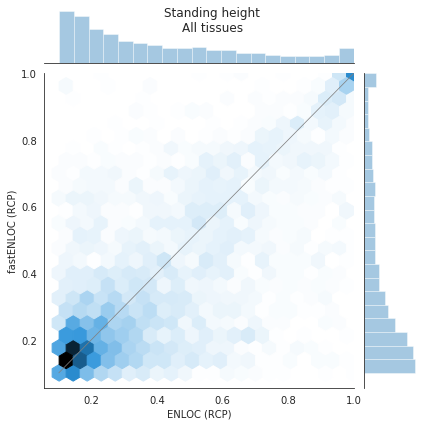

In [46]:
df_plot_final = df_plot.rename(columns={'ENLOC': 'ENLOC (RCP)', 'fastENLOC': 'fastENLOC (RCP)'})

with sns.axes_style("white"):
    ax = sns.jointplot(data=df_plot_final, x='ENLOC (RCP)', y='fastENLOC (RCP)', kind='hex')
    ax.ax_joint.plot([0.10, 1.0], [0.10, 1.0], 'gray', linewidth=0.75)
    ax.fig.suptitle(f'{metadata.RAPID_GWAS_PHENO_INFO.loc[PHENOTYPE_SELECTED, "description"]}\nAll tissues')

    fig_path = os.path.join(figures_path, 'sup_fig3a.png')
    plt.savefig(fig_path, dpi=150, bbox_inches='tight')

## Sleep duration: 1160

In [47]:
PHENOTYPE_SELECTED = '1160'

In [48]:
fe_all = read_fe_all_tissues(PHENOTYPE_SELECTED)

In [49]:
fe_all.shape

(37360, 47)

In [50]:
fe_all.head()

,Artery_Aorta,Heart_Atrial_Appendage,Pituitary,Testis,Muscle_Skeletal,Uterus,Colon_Transverse,Stomach,Artery_Coronary,Whole_Blood,...,Adipose_Subcutaneous,Brain_Cerebellum,Vagina,Brain_Nucleus_accumbens_basal_ganglia,Brain_Cortex,Spleen,Cells_EBV-transformed_lymphocytes,Prostate,Nerve_Tibial,Thyroid
ENSG00000000419,0.000048,0.000069,0.000450,0.000169,0.000228,0.003234,0.000118,0.000123,0.000180,0.000099,...,0.000259,0.005033,0.000089,0.000199,0.000330,0.000150,0.000425,0.000060,0.000564,0.000314
ENSG00000000457,0.001863,0.000237,0.003489,0.000970,0.003843,0.000678,0.001177,0.000592,0.000363,0.002181,...,0.004270,0.006201,0.000164,0.002288,0.003716,0.001861,0.001129,0.000615,0.004424,0.003474
ENSG00000000460,0.003556,0.001487,0.003383,0.001123,0.003275,0.000233,0.001255,0.000182,0.000144,0.002590,...,0.000976,0.005614,0.000407,0.000809,0.001916,0.000076,0.000162,0.002880,0.001914,0.002291
ENSG00000000938,0.000956,0.000069,0.000079,0.001454,0.001803,0.000058,0.000920,0.000759,0.000046,0.000290,...,0.001499,0.000223,0.000048,0.000047,0.000059,0.000211,0.000192,0.000054,0.001341,0.001326
ENSG00000000971,0.002949,0.004150,0.002573,0.001764,0.000247,0.000090,0.000094,0.000493,0.004447,0.000593,...,0.001776,0.004237,0.000050,0.000036,0.004714,0.000388,0.000077,0.000031,0.004551,0.004089


In [51]:
enloc_all = read_enloc_all_tissues(PHENO_MAPPINGS[PHENOTYPE_SELECTED])

In [52]:
enloc_all.shape

(3893, 47)

In [53]:
enloc_all.head()

,Artery_Aorta,Heart_Atrial_Appendage,Pituitary,Testis,Muscle_Skeletal,Uterus,Colon_Transverse,Stomach,Artery_Coronary,Whole_Blood,...,Adipose_Subcutaneous,Brain_Cerebellum,Vagina,Brain_Nucleus_accumbens_basal_ganglia,Brain_Cortex,Spleen,Cells_EBV-transformed_lymphocytes,Prostate,Nerve_Tibial,Thyroid
ENSG00000001084,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000001167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000001626,NaN,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0
ENSG00000002549,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000002745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN


In [54]:
df = create_df_plot(fe_all, enloc_all)

In [55]:
df.shape

(110531, 2)

In [56]:
df.head()

,,ENLOC,fastENLOC
Breast_Mammary_Tissue,ENSG00000253688,0.0,0.000060
Ovary,ENSG00000167264,0.0,0.000029
Nerve_Tibial,ENSG00000058668,0.0,0.000216
Small_Intestine_Terminal_Ileum,ENSG00000214940,0.0,0.000020
Muscle_Skeletal,ENSG00000128346,0.0,0.000005


In [57]:
df_plot = df[(df['ENLOC'] > 0.1) & (df['fastENLOC'] > 0.1)]

In [58]:
stats.pearsonr(df_plot['ENLOC'].values, df_plot['fastENLOC'].values)

(0.5371303662556126, 4.3588009705142455e-39)

In [59]:
stats.spearmanr(df_plot['ENLOC'].values, df_plot['fastENLOC'].values)

SpearmanrResult(correlation=0.4962337249262243, pvalue=9.454428881249122e-33)

In [60]:
# with sns.axes_style("white"):
#     ax = sns.jointplot(data=df_plot, x='ENLOC', y='fastENLOC', kind='kde')
#     ax.ax_joint.plot([0.0, 1.0], [0.0, 1.0], 'gray', linewidth=0.75)
#     ax.ax_joint.set_xlim([0.0, 1.10])
#     ax.ax_joint.set_ylim([0.0, 1.10])

In [61]:
# final refining
df_plot = df_plot[df_plot['fastENLOC'] <= 1.05]

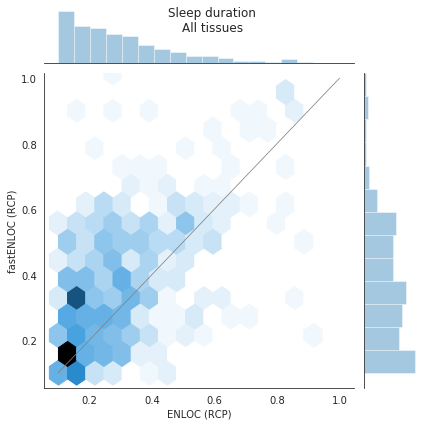

In [62]:
df_plot_final = df_plot.rename(columns={'ENLOC': 'ENLOC (RCP)', 'fastENLOC': 'fastENLOC (RCP)'})

with sns.axes_style("white"):
    ax = sns.jointplot(data=df_plot_final, x='ENLOC (RCP)', y='fastENLOC (RCP)', kind='hex')
    ax.ax_joint.plot([0.10, 1.0], [0.10, 1.0], 'gray', linewidth=0.75)
    ax.fig.suptitle(f'{metadata.RAPID_GWAS_PHENO_INFO.loc[PHENOTYPE_SELECTED, "description"]}\nAll tissues')
    
    fig_path = os.path.join(figures_path, 'sup_fig3b.png')
    plt.savefig(fig_path, dpi=150, bbox_inches='tight')

## Ezcema: 6152_9

In [63]:
PHENOTYPE_SELECTED = '6152_9'

In [64]:
fe_all = read_fe_all_tissues(PHENOTYPE_SELECTED)

In [65]:
fe_all.shape

(37360, 47)

In [66]:
fe_all.head()

,Artery_Aorta,Heart_Atrial_Appendage,Pituitary,Testis,Muscle_Skeletal,Uterus,Colon_Transverse,Stomach,Artery_Coronary,Whole_Blood,...,Adipose_Subcutaneous,Brain_Cerebellum,Vagina,Brain_Nucleus_accumbens_basal_ganglia,Brain_Cortex,Spleen,Cells_EBV-transformed_lymphocytes,Prostate,Nerve_Tibial,Thyroid
ENSG00000000419,1.961000e-15,4.144000e-15,2.226500e-14,9.369000e-15,2.437400e-14,1.372047e-13,6.794000e-15,5.626000e-15,9.596000e-15,9.731000e-15,...,6.321000e-14,1.616160e-13,7.393000e-15,1.506000e-14,1.837200e-14,1.888900e-14,2.666400e-14,4.770000e-15,4.929500e-14,2.318400e-14
ENSG00000000457,1.153140e-03,3.233000e-04,2.324800e-03,1.024291e-03,4.591450e-03,3.397480e-03,3.287700e-03,1.481400e-03,6.391000e-04,3.463220e-03,...,5.710100e-03,6.690430e-03,2.781000e-04,1.801770e-03,2.404130e-03,2.226440e-03,2.990100e-03,5.715400e-04,3.821500e-03,3.174030e-03
ENSG00000000460,1.339521e-02,3.663120e-03,5.909800e-03,9.540600e-04,1.220359e-02,1.476800e-04,2.042986e-02,1.204400e-04,1.363000e-04,4.282822e-03,...,2.813720e-03,8.284402e-03,2.017920e-03,6.321800e-04,1.175800e-03,7.737000e-05,1.556500e-04,1.993822e-02,4.973043e-03,7.045720e-03
ENSG00000000938,3.619700e-04,8.675000e-05,7.524000e-05,1.429586e-03,1.075830e-03,6.548000e-05,4.851000e-04,4.448100e-04,3.628000e-05,2.793840e-04,...,1.140860e-03,8.652000e-05,3.091500e-05,2.885100e-05,3.816000e-05,1.182200e-04,1.487000e-04,2.399700e-05,7.333000e-04,8.410000e-04
ENSG00000000971,7.671980e-04,8.611149e-04,1.767006e-03,3.184550e-04,9.333400e-04,3.674000e-06,5.811000e-06,2.986700e-05,1.058488e-03,5.628000e-05,...,8.285000e-04,8.091960e-03,1.634000e-06,1.927000e-06,1.331880e-02,1.543221e-03,5.500000e-06,1.322000e-06,9.910700e-04,4.058235e-03


In [67]:
enloc_all = read_enloc_all_tissues(PHENO_MAPPINGS[PHENOTYPE_SELECTED])

In [68]:
enloc_all.shape

(8552, 47)

In [69]:
enloc_all.head()

,Artery_Aorta,Heart_Atrial_Appendage,Pituitary,Testis,Muscle_Skeletal,Uterus,Colon_Transverse,Stomach,Artery_Coronary,Whole_Blood,...,Adipose_Subcutaneous,Brain_Cerebellum,Vagina,Brain_Nucleus_accumbens_basal_ganglia,Brain_Cortex,Spleen,Cells_EBV-transformed_lymphocytes,Prostate,Nerve_Tibial,Thyroid
ENSG00000000419,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.0,0.000,0.000
ENSG00000000457,0.00,0.000,NaN,NaN,NaN,0.000,NaN,0.000,0.000,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENSG00000000460,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,0.000,NaN,...,NaN,NaN,NaN,0.0,NaN,0.000,NaN,NaN,NaN,NaN
ENSG00000000938,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.0,0.000,0.000
ENSG00000000971,0.03,0.018,0.001,0.002,0.003,0.001,0.002,0.001,0.008,0.001,...,0.071,0.027,0.0,0.0,0.022,0.003,0.002,0.0,0.004,0.008


In [70]:
df = create_df_plot(fe_all, enloc_all)

In [71]:
df.shape

(261362, 2)

In [72]:
df.head()

,,ENLOC,fastENLOC
Brain_Substantia_nigra,ENSG00000183773,0.0,1.887100e-08
Cells_EBV-transformed_lymphocytes,ENSG00000105669,0.0,9.773000e-05
Minor_Salivary_Gland,ENSG00000213719,0.0,9.449099e-29
Artery_Coronary,ENSG00000148082,0.0,4.714000e-05
Brain_Spinal_cord_cervical_c-1,ENSG00000239642,0.0,2.115500e-09


In [73]:
df_plot = df[(df['ENLOC'] > 0.1) & (df['fastENLOC'] > 0.1)]

In [74]:
stats.pearsonr(df_plot['ENLOC'].values, df_plot['fastENLOC'].values)

(0.6233660310122904, 1.4124378242871114e-153)

In [75]:
stats.spearmanr(df_plot['ENLOC'].values, df_plot['fastENLOC'].values)

SpearmanrResult(correlation=0.5578478419640255, pvalue=7.422682142383947e-117)

In [76]:
# final refining
df_plot = df_plot[df_plot['fastENLOC'] <= 1.05]

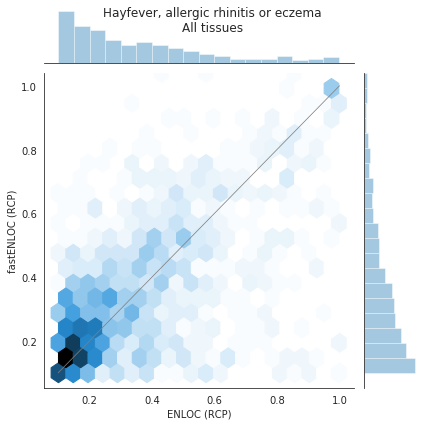

In [77]:
df_plot_final = df_plot.rename(columns={'ENLOC': 'ENLOC (RCP)', 'fastENLOC': 'fastENLOC (RCP)'})

with sns.axes_style("white"):
    ax = sns.jointplot(data=df_plot_final, x='ENLOC (RCP)', y='fastENLOC (RCP)', kind='hex')
    ax.ax_joint.plot([0.10, 1.0], [0.10, 1.0], 'gray', linewidth=0.75)
    ax.fig.suptitle(f'Hayfever, allergic rhinitis or eczema\nAll tissues')
    
    fig_path = os.path.join(figures_path, 'sup_fig3c.png')
    plt.savefig(fig_path, dpi=150, bbox_inches='tight')

## Fluid intelligence score: 20016

In [78]:
PHENOTYPE_SELECTED = '20016_raw'

In [79]:
fe_all = read_fe_all_tissues(PHENOTYPE_SELECTED)

In [80]:
fe_all.shape

(37360, 47)

In [81]:
fe_all.head()

,Artery_Aorta,Heart_Atrial_Appendage,Pituitary,Testis,Muscle_Skeletal,Uterus,Colon_Transverse,Stomach,Artery_Coronary,Whole_Blood,...,Adipose_Subcutaneous,Brain_Cerebellum,Vagina,Brain_Nucleus_accumbens_basal_ganglia,Brain_Cortex,Spleen,Cells_EBV-transformed_lymphocytes,Prostate,Nerve_Tibial,Thyroid
ENSG00000000419,0.000011,0.000072,0.000181,0.000261,0.000209,0.001504,0.000072,0.000070,0.000127,0.000069,...,0.000297,0.002593,0.000164,0.000197,0.000141,0.000266,0.000147,0.000050,0.000708,0.000177
ENSG00000000457,0.001925,0.000350,0.003130,0.002261,0.005698,0.000391,0.004554,0.000933,0.000782,0.003171,...,0.005395,0.010985,0.000502,0.002980,0.002767,0.002590,0.002936,0.000942,0.005322,0.003608
ENSG00000000460,0.008457,0.003674,0.005893,0.002691,0.008233,0.000736,0.004771,0.000250,0.000293,0.005964,...,0.002246,0.014797,0.001468,0.002126,0.002414,0.000172,0.000317,0.008568,0.006590,0.006567
ENSG00000000938,0.000302,0.000022,0.000019,0.000749,0.000651,0.000021,0.000584,0.000288,0.000011,0.000066,...,0.000535,0.000092,0.000016,0.000021,0.000017,0.000046,0.000092,0.000027,0.000583,0.000567
ENSG00000000971,0.004514,0.005657,0.001660,0.003654,0.000451,0.000110,0.000397,0.001403,0.005085,0.000778,...,0.002402,0.008849,0.000082,0.000059,0.006724,0.000639,0.000168,0.000037,0.021309,0.005029


In [82]:
enloc_all = read_enloc_all_tissues(PHENO_MAPPINGS[PHENOTYPE_SELECTED])

In [83]:
enloc_all.shape

(4776, 47)

In [84]:
enloc_all.head()

,Artery_Aorta,Heart_Atrial_Appendage,Pituitary,Testis,Muscle_Skeletal,Uterus,Colon_Transverse,Stomach,Artery_Coronary,Whole_Blood,...,Adipose_Subcutaneous,Brain_Cerebellum,Vagina,Brain_Nucleus_accumbens_basal_ganglia,Brain_Cortex,Spleen,Cells_EBV-transformed_lymphocytes,Prostate,Nerve_Tibial,Thyroid
ENSG00000000419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0
ENSG00000000457,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENSG00000000460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
ENSG00000000938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0
ENSG00000001617,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002,0.0


In [85]:
df = create_df_plot(fe_all, enloc_all)

In [86]:
df.shape

(142961, 2)

In [87]:
df.head()

,,ENLOC,fastENLOC
Artery_Aorta,ENSG00000158169,0.002,0.000053
Ovary,ENSG00000167264,0.000,0.000034
Brain_Substantia_nigra,ENSG00000204267,0.000,0.004734
Vagina,ENSG00000213390,0.054,0.055827
Ovary,ENSG00000134291,0.000,0.001342


In [88]:
df_plot = df[(df['ENLOC'] > 0.1) & (df['fastENLOC'] > 0.1)]

In [89]:
stats.pearsonr(df_plot['ENLOC'].values, df_plot['fastENLOC'].values)

(0.7131721674695346, 8.640973583438526e-258)

In [90]:
stats.spearmanr(df_plot['ENLOC'].values, df_plot['fastENLOC'].values)

SpearmanrResult(correlation=0.6452734877084828, pvalue=6.907513742006892e-196)

In [91]:
# final refining
df_plot = df_plot[df_plot['fastENLOC'] <= 1.05]

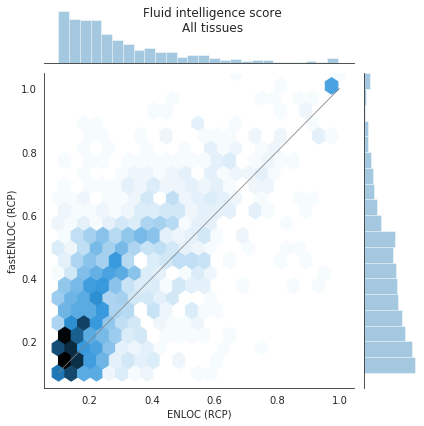

In [92]:
df_plot_final = df_plot.rename(columns={'ENLOC': 'ENLOC (RCP)', 'fastENLOC': 'fastENLOC (RCP)'})

with sns.axes_style("white"):
    ax = sns.jointplot(data=df_plot_final, x='ENLOC (RCP)', y='fastENLOC (RCP)', kind='hex')
    ax.ax_joint.plot([0.10, 1.0], [0.10, 1.0], 'gray', linewidth=0.75)
    ax.fig.suptitle(f'{metadata.RAPID_GWAS_PHENO_INFO.loc[PHENOTYPE_SELECTED, "description"]}\nAll tissues')
    
    fig_path = os.path.join(figures_path, 'sup_fig3d.png')
    plt.savefig(fig_path, dpi=150, bbox_inches='tight')